# About Program

**概要**  
画像に映っている1人の骨格を検出します。  
solver : mediapipe





**使用手順**
1. ランタイム（サイト上部のタブ） > すべてのセルを実行
1. （人が映っている）写真をアップロード
1. 結果を確認し、ダウンロード



# Imports

In [1]:
!pip install mediapipe

In [2]:
from google.colab import files
from google.colab.patches import cv2_imshow
import os
from datetime import datetime
import math
import numpy as np
import cv2
import mediapipe as mp

In [3]:
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils 
mp_drawing_styles = mp.solutions.drawing_styles

In [4]:
now = datetime.now()
dirname = 'data_' + now.strftime('%Y%m%d_%H%M%S')
os.mkdir(dirname)
os.chdir(dirname)

# Upload Images

画像をアップロードしてください。（複数枚可）

In [5]:
uploaded = files.upload()

Saving test_ohtani.jpg to test_ohtani.jpg


# Analysis

In [6]:
DESIRED_HEIGHT = 480
DESIRED_WIDTH = 480
def resize_and_show(image):
  h, w = image.shape[:2]
  if h < w:
    img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
  else:
    img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
  cv2_imshow(img)

test_ohtani.jpg


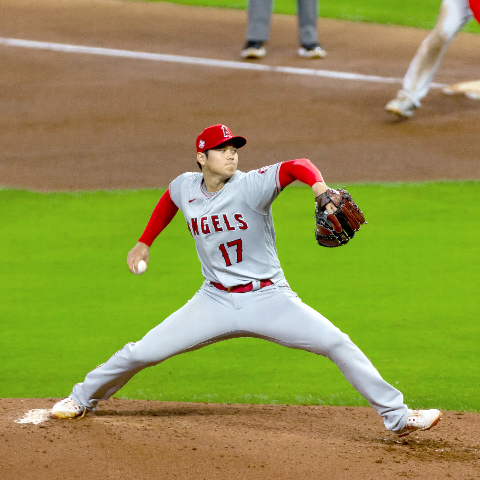

In [7]:
# Read images with OpenCV.
images = {name: cv2.imread(name) for name in uploaded.keys()}

# Show imput images.
for name, image in images.items():
  print(name)   
  resize_and_show(image)

test_ohtani.jpg:


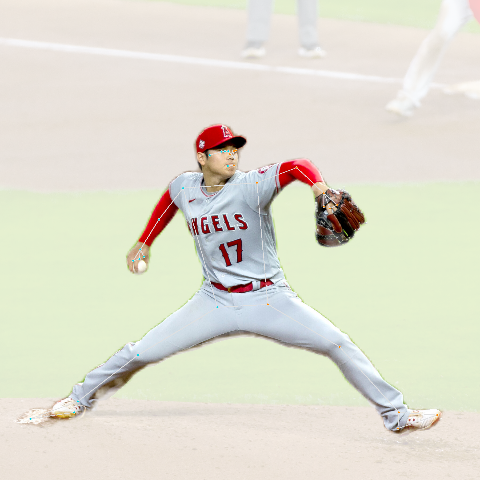

In [8]:
# Create dict for result images.
result_images = {}

# Run MediaPipe Pose and draw pose landmarks.
with mp_pose.Pose(
    static_image_mode=True, 
    min_detection_confidence=0.5, 
    model_complexity=2,
    enable_segmentation=True) as pose:
  for name, image in images.items():
    # Convert the BGR image to RGB and process it with MediaPipe Pose.
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Check Image name.
    print(f'{name}:')
    annotated_image = image.copy()

    # Draw pose segmentation.
    red_img = np.zeros_like(annotated_image, dtype=np.uint8)
    red_img[:, :] = (255,255,255)
    segm_2class = 0.2 + 0.8 * results.segmentation_mask
    segm_2class = np.repeat(segm_2class[..., np.newaxis], 3, axis=2)
    annotated_image = annotated_image * segm_2class + red_img * (1 - segm_2class)

    # Draw pose landmarks.
    mp_drawing.draw_landmarks(
        annotated_image,
        results.pose_landmarks,
        mp_pose.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
    
    # Show result images.
    resize_and_show(annotated_image)

    # Add annotated image to result images dict.
    result_images['result_'+name] = annotated_image

In [9]:
for name, image in result_images.items():
  cv2.imwrite(name, image)

# Download Images



In [13]:
for name in result_images.keys():
  files.download(name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>